In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **TEMP ALG2**

In [ ]:
import pandas as pd
 
temp_alg2 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg2.csv")
temp_alg2 = temp_alg2.drop(['Unnamed: 0'], axis=1)
print(temp_alg2)

     id  alg  time    3    4    5    6    7    8    9  ...  79593  79594  \
0     1    2     1  937  937  937  937  937  938  936  ...    936    937   
1     1    2     2  937  938  937  937  937  938  938  ...    937    937   
2     1    2     3  938  937  937  937  937  938  937  ...    938    936   
3     1    2     4  938  937  937  937  937  937  937  ...    938    937   
4     1    2     5  938  936  938  938  938  938  936  ...    938    937   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    2   996  938  940  939  939  939  939  940  ...    939    939   
996  10    2   997  939  941  939  938  939  939  941  ...    940    940   
997  10    2   998  940  938  939  939  940  939  938  ...    940    939   
998  10    2   999  941  939  940  939  940  939  939  ...    939    939   
999  10    2  1000  939  939  940  939  938  940  939  ...    940    939   

     79595  79596  79597  79598  79599  79600  79601  79602  
0      936    937    937 

In [ ]:
temp_alg2_diezmado = []
for i in range(len(temp_alg2)):
  if(i % 10 == 0):
    temp_alg2_diezmado = np.append(temp_alg2_diezmado, temp_alg2.iloc[i], axis = 0)
temp_alg2_diezmado = np.reshape(temp_alg2_diezmado, (100,79603))
temp_alg2_diezmado = pd.DataFrame(temp_alg2_diezmado)
print(temp_alg2_diezmado)

    0      1      2      3      4      5      6      7      8      9      ...  \
0     1.0    2.0    1.0  937.0  937.0  937.0  937.0  937.0  938.0  936.0  ...   
1     1.0    2.0   11.0  937.0  939.0  937.0  937.0  936.0  936.0  938.0  ...   
2     1.0    2.0   21.0  938.0  938.0  938.0  937.0  937.0  937.0  938.0  ...   
3     1.0    2.0   31.0  937.0  938.0  937.0  938.0  937.0  938.0  937.0  ...   
4     1.0    2.0   41.0  939.0  938.0  937.0  937.0  939.0  939.0  938.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95   10.0    2.0  951.0  939.0  939.0  939.0  939.0  940.0  939.0  940.0  ...   
96   10.0    2.0  961.0  940.0  940.0  940.0  940.0  940.0  938.0  940.0  ...   
97   10.0    2.0  971.0  940.0  940.0  940.0  940.0  939.0  938.0  940.0  ...   
98   10.0    2.0  981.0  939.0  938.0  940.0  939.0  940.0  939.0  940.0  ...   
99   10.0    2.0  991.0  940.0  940.0  940.0  940.0  939.0  941.0  939.0  ...   

    79593  79594  79595  79

In [ ]:
Y = temp_alg2_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = temp_alg2_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,79593,79594,79595,79596,79597,79598,79599,79600,79601,79602
0,937.0,937.0,937.0,937.0,937.0,938.0,936.0,938.0,937.0,937.0,...,936.0,937.0,936.0,937.0,937.0,936.0,938.0,938.0,938.0,938.0
1,937.0,939.0,937.0,937.0,936.0,936.0,938.0,937.0,936.0,937.0,...,937.0,936.0,937.0,939.0,937.0,938.0,939.0,936.0,937.0,937.0
2,938.0,938.0,938.0,937.0,937.0,937.0,938.0,937.0,938.0,937.0,...,938.0,936.0,938.0,938.0,938.0,937.0,936.0,936.0,937.0,938.0
3,937.0,938.0,937.0,938.0,937.0,938.0,937.0,937.0,937.0,939.0,...,937.0,936.0,936.0,937.0,939.0,938.0,937.0,937.0,937.0,937.0
4,939.0,938.0,937.0,937.0,939.0,939.0,938.0,937.0,939.0,939.0,...,938.0,938.0,938.0,939.0,938.0,938.0,937.0,938.0,936.0,937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,939.0,939.0,939.0,939.0,940.0,939.0,940.0,940.0,940.0,940.0,...,939.0,940.0,939.0,940.0,940.0,939.0,940.0,940.0,940.0,940.0
96,940.0,940.0,940.0,940.0,940.0,938.0,940.0,941.0,938.0,939.0,...,939.0,940.0,939.0,940.0,939.0,939.0,938.0,939.0,940.0,938.0
97,940.0,940.0,940.0,940.0,939.0,938.0,940.0,941.0,939.0,939.0,...,940.0,940.0,939.0,940.0,940.0,940.0,939.0,939.0,939.0,940.0
98,939.0,938.0,940.0,939.0,940.0,939.0,940.0,941.0,940.0,939.0,...,939.0,939.0,939.0,939.0,940.0,941.0,940.0,940.0,940.0,939.0


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

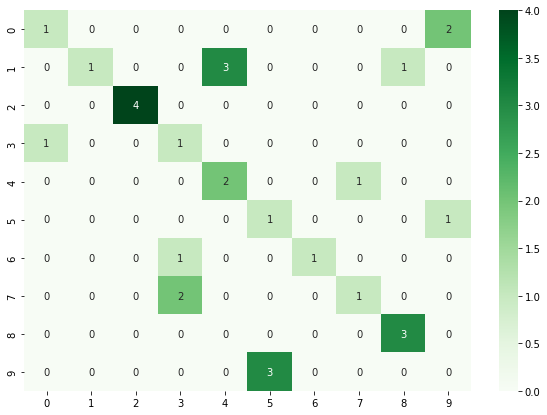

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.50      0.33      0.40         3
         2.0       1.00      0.20      0.33         5
         3.0       1.00      1.00      1.00         4
         4.0       0.25      0.50      0.33         2
         5.0       0.40      0.67      0.50         3
         6.0       0.25      0.50      0.33         2
         7.0       1.00      0.50      0.67         2
         8.0       0.50      0.33      0.40         3
         9.0       0.75      1.00      0.86         3
        10.0       0.00      0.00      0.00         3

    accuracy                           0.50        30
   macro avg       0.57      0.50      0.48        30
weighted avg       0.61      0.50      0.49        30



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


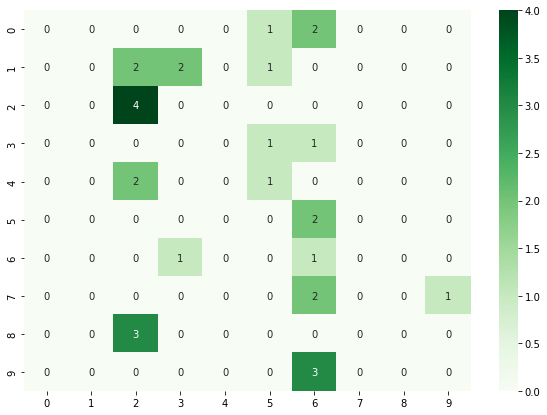

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         5
         3.0       0.36      1.00      0.53         4
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         2
         7.0       0.09      0.50      0.15         2
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         3

    accuracy                           0.17        30
   macro avg       0.05      0.15      0.07        30
weighted avg       0.05      0.17      0.08        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **VOLT ALG2**

In [ ]:
import pandas as pd
 
volt_alg2 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg2.csv")
volt_alg2 = volt_alg2.drop(['Unnamed: 0'], axis=1)
print(volt_alg2)

     id  alg  time     3     4     5     6     7     8     9  ...  79593  \
0     1    2     1  1490  1490  1490  1490  1490  1490  1490  ...   1490   
1     1    2     2  1489  1489  1489  1490  1489  1490  1490  ...   1490   
2     1    2     3  1489  1490  1490  1490  1489  1490  1489  ...   1490   
3     1    2     4  1489  1491  1489  1489  1489  1489  1490  ...   1489   
4     1    2     5  1489  1490  1490  1489  1490  1490  1490  ...   1490   
..   ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
995  10    2   996  1503  1503  1502  1502  1503  1503  1502  ...   1503   
996  10    2   997  1503  1503  1503  1502  1503  1503  1503  ...   1502   
997  10    2   998  1503  1504  1503  1504  1503  1503  1503  ...   1503   
998  10    2   999  1503  1503  1503  1503  1503  1503  1503  ...   1502   
999  10    2  1000  1503  1502  1502  1502  1503  1503  1502  ...   1503   

     79594  79595  79596  79597  79598  79599  79600  79601  79602  
0     1489   1490 

In [ ]:
volt_alg2_diezmado = []
for i in range(len(volt_alg2)):
  if(i % 10 == 0):
    volt_alg2_diezmado = np.append(volt_alg2_diezmado, volt_alg2.iloc[i], axis = 0)
volt_alg2_diezmado = np.reshape(volt_alg2_diezmado, (100,79603))
volt_alg2_diezmado = pd.DataFrame(volt_alg2_diezmado)
print(volt_alg2_diezmado)

    0      1      2       3       4       5       6       7       8      \
0     1.0    2.0    1.0  1490.0  1490.0  1490.0  1490.0  1490.0  1490.0   
1     1.0    2.0   11.0  1489.0  1489.0  1490.0  1489.0  1489.0  1489.0   
2     1.0    2.0   21.0  1491.0  1490.0  1489.0  1490.0  1490.0  1490.0   
3     1.0    2.0   31.0  1489.0  1489.0  1490.0  1490.0  1490.0  1490.0   
4     1.0    2.0   41.0  1489.0  1490.0  1490.0  1490.0  1489.0  1490.0   
..    ...    ...    ...     ...     ...     ...     ...     ...     ...   
95   10.0    2.0  951.0  1502.0  1502.0  1502.0  1502.0  1502.0  1502.0   
96   10.0    2.0  961.0  1502.0  1503.0  1503.0  1503.0  1504.0  1503.0   
97   10.0    2.0  971.0  1503.0  1503.0  1501.0  1503.0  1503.0  1503.0   
98   10.0    2.0  981.0  1503.0  1503.0  1503.0  1503.0  1503.0  1502.0   
99   10.0    2.0  991.0  1503.0  1502.0  1502.0  1503.0  1502.0  1502.0   

     9      ...   79593   79594   79595   79596   79597   79598   79599  \
0   1490.0  ...  1490.0 

In [ ]:
Y = volt_alg2_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = volt_alg2_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,79593,79594,79595,79596,79597,79598,79599,79600,79601,79602
0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,...,1490.0,1489.0,1490.0,1491.0,1490.0,1490.0,1491.0,1490.0,1490.0,1490.0
1,1489.0,1489.0,1490.0,1489.0,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,...,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0
2,1491.0,1490.0,1489.0,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,...,1490.0,1490.0,1489.0,1490.0,1489.0,1489.0,1489.0,1490.0,1490.0,1490.0
3,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0,1489.0,...,1489.0,1490.0,1489.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0
4,1489.0,1490.0,1490.0,1490.0,1489.0,1490.0,1489.0,1490.0,1489.0,1490.0,...,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1502.0,1502.0,1502.0,1502.0,1502.0,1502.0,1503.0,1502.0,1504.0,1502.0,...,1502.0,1502.0,1503.0,1502.0,1502.0,1502.0,1504.0,1502.0,1503.0,1502.0
96,1502.0,1503.0,1503.0,1503.0,1504.0,1503.0,1503.0,1503.0,1503.0,1503.0,...,1503.0,1503.0,1503.0,1502.0,1503.0,1502.0,1503.0,1503.0,1503.0,1503.0
97,1503.0,1503.0,1501.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1502.0,...,1502.0,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1501.0,1502.0
98,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1502.0,1503.0,1503.0,1503.0,...,1503.0,1503.0,1503.0,1503.0,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

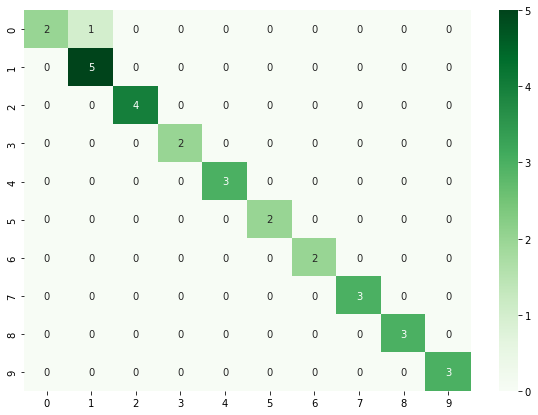

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.67      0.80         3
         2.0       0.83      1.00      0.91         5
         3.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         3
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.96        30



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


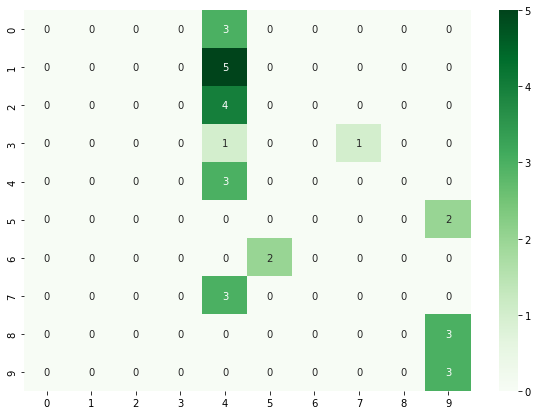

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2
         5.0       0.16      1.00      0.27         3
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         3
        10.0       0.38      1.00      0.55         3

    accuracy                           0.20        30
   macro avg       0.05      0.20      0.08        30
weighted avg       0.05      0.20      0.08        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ALGORITMO 2**

In [ ]:
import pandas as pd

temp_alg2 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg2.csv")
temp_alg2 = temp_alg2.drop(['Unnamed: 0'], axis=1)
print(temp_alg2)

volt_alg2 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg2.csv")
volt_alg2 = volt_alg2.drop(['Unnamed: 0', 'id', 'alg'], axis=1)
print(volt_alg2)

     id  alg  time    3    4    5    6    7    8    9  ...  79593  79594  \
0     1    2     1  937  937  937  937  937  938  936  ...    936    937   
1     1    2     2  937  938  937  937  937  938  938  ...    937    937   
2     1    2     3  938  937  937  937  937  938  937  ...    938    936   
3     1    2     4  938  937  937  937  937  937  937  ...    938    937   
4     1    2     5  938  936  938  938  938  938  936  ...    938    937   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    2   996  938  940  939  939  939  939  940  ...    939    939   
996  10    2   997  939  941  939  938  939  939  941  ...    940    940   
997  10    2   998  940  938  939  939  940  939  938  ...    940    939   
998  10    2   999  941  939  940  939  940  939  939  ...    939    939   
999  10    2  1000  939  939  940  939  938  940  939  ...    940    939   

     79595  79596  79597  79598  79599  79600  79601  79602  
0      936    937    937 

In [ ]:
alg2 = pd.merge(temp_alg2, volt_alg2, on='time', suffixes=('_1', '_2'))
alg2

alg2_diezmado = []
for i in range(len(alg2)):
  if(i % 10 == 0):
    alg2_diezmado = np.append(alg2_diezmado, alg2.iloc[i], axis = 0)
alg2_diezmado = np.reshape(alg2_diezmado, (100,159203))
alg2_diezmado = pd.DataFrame(alg2_diezmado)
print(alg2_diezmado)

    0       1       2       3       4       5       6       7       8       \
0      1.0     2.0     1.0   937.0   937.0   937.0   937.0   937.0   938.0   
1      1.0     2.0    11.0   937.0   939.0   937.0   937.0   936.0   936.0   
2      1.0     2.0    21.0   938.0   938.0   938.0   937.0   937.0   937.0   
3      1.0     2.0    31.0   937.0   938.0   937.0   938.0   937.0   938.0   
4      1.0     2.0    41.0   939.0   938.0   937.0   937.0   939.0   939.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95    10.0     2.0   951.0   939.0   939.0   939.0   939.0   940.0   939.0   
96    10.0     2.0   961.0   940.0   940.0   940.0   940.0   940.0   938.0   
97    10.0     2.0   971.0   940.0   940.0   940.0   940.0   939.0   938.0   
98    10.0     2.0   981.0   939.0   938.0   940.0   939.0   940.0   939.0   
99    10.0     2.0   991.0   940.0   940.0   940.0   940.0   939.0   941.0   

    9       ...  159193  159194  159195  159196  159197  159198

In [ ]:
Y = alg2_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = alg2_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,159193,159194,159195,159196,159197,159198,159199,159200,159201,159202
0,937.0,937.0,937.0,937.0,937.0,938.0,936.0,938.0,937.0,937.0,...,1490.0,1489.0,1490.0,1491.0,1490.0,1490.0,1491.0,1490.0,1490.0,1490.0
1,937.0,939.0,937.0,937.0,936.0,936.0,938.0,937.0,936.0,937.0,...,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0
2,938.0,938.0,938.0,937.0,937.0,937.0,938.0,937.0,938.0,937.0,...,1490.0,1490.0,1489.0,1490.0,1489.0,1489.0,1489.0,1490.0,1490.0,1490.0
3,937.0,938.0,937.0,938.0,937.0,938.0,937.0,937.0,937.0,939.0,...,1489.0,1490.0,1489.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0
4,939.0,938.0,937.0,937.0,939.0,939.0,938.0,937.0,939.0,939.0,...,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,939.0,939.0,939.0,939.0,940.0,939.0,940.0,940.0,940.0,940.0,...,1502.0,1502.0,1503.0,1502.0,1502.0,1502.0,1504.0,1502.0,1503.0,1502.0
96,940.0,940.0,940.0,940.0,940.0,938.0,940.0,941.0,938.0,939.0,...,1503.0,1503.0,1503.0,1502.0,1503.0,1502.0,1503.0,1503.0,1503.0,1503.0
97,940.0,940.0,940.0,940.0,939.0,938.0,940.0,941.0,939.0,939.0,...,1502.0,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1501.0,1502.0
98,939.0,938.0,940.0,939.0,940.0,939.0,940.0,941.0,940.0,939.0,...,1503.0,1503.0,1503.0,1503.0,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0


### **kNN**


In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

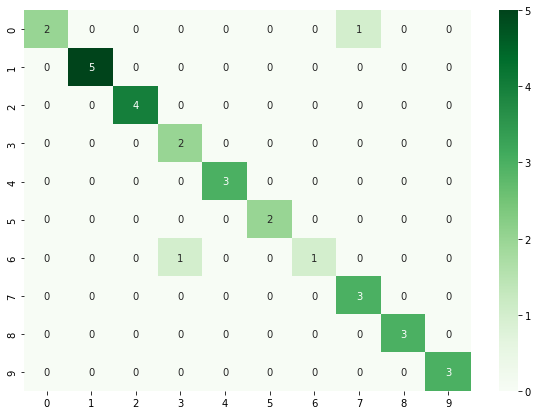

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.67      0.80         3
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         4
         4.0       0.67      1.00      0.80         2
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      0.50      0.67         2
         8.0       0.75      1.00      0.86         3
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.91        30
weighted avg       0.95      0.93      0.93        30



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


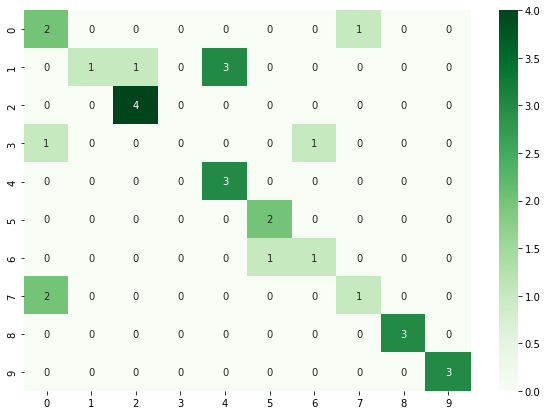

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.40      0.67      0.50         3
         2.0       1.00      0.20      0.33         5
         3.0       0.80      1.00      0.89         4
         4.0       0.00      0.00      0.00         2
         5.0       0.50      1.00      0.67         3
         6.0       0.67      1.00      0.80         2
         7.0       0.50      0.50      0.50         2
         8.0       0.50      0.33      0.40         3
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.67        30
   macro avg       0.64      0.67      0.61        30
weighted avg       0.69      0.67      0.62        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Exportar los datos**

In [ ]:
temp_alg2_diezmado.rename(columns={temp_alg2_diezmado.columns[0]:'id'}, inplace=True)
temp_alg2_diezmado.rename(columns={temp_alg2_diezmado.columns[2]:'time'}, inplace=True)
temp_alg2_diezmado

,id,1,time,3,4,5,6,7,8,9,...,79593,79594,79595,79596,79597,79598,79599,79600,79601,79602
0,1.0,2.0,1.0,937.0,937.0,937.0,937.0,937.0,938.0,936.0,...,936.0,937.0,936.0,937.0,937.0,936.0,938.0,938.0,938.0,938.0
1,1.0,2.0,11.0,937.0,939.0,937.0,937.0,936.0,936.0,938.0,...,937.0,936.0,937.0,939.0,937.0,938.0,939.0,936.0,937.0,937.0
2,1.0,2.0,21.0,938.0,938.0,938.0,937.0,937.0,937.0,938.0,...,938.0,936.0,938.0,938.0,938.0,937.0,936.0,936.0,937.0,938.0
3,1.0,2.0,31.0,937.0,938.0,937.0,938.0,937.0,938.0,937.0,...,937.0,936.0,936.0,937.0,939.0,938.0,937.0,937.0,937.0,937.0
4,1.0,2.0,41.0,939.0,938.0,937.0,937.0,939.0,939.0,938.0,...,938.0,938.0,938.0,939.0,938.0,938.0,937.0,938.0,936.0,937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0,2.0,951.0,939.0,939.0,939.0,939.0,940.0,939.0,940.0,...,939.0,940.0,939.0,940.0,940.0,939.0,940.0,940.0,940.0,940.0
96,10.0,2.0,961.0,940.0,940.0,940.0,940.0,940.0,938.0,940.0,...,939.0,940.0,939.0,940.0,939.0,939.0,938.0,939.0,940.0,938.0
97,10.0,2.0,971.0,940.0,940.0,940.0,940.0,939.0,938.0,940.0,...,940.0,940.0,939.0,940.0,940.0,940.0,939.0,939.0,939.0,940.0
98,10.0,2.0,981.0,939.0,938.0,940.0,939.0,940.0,939.0,940.0,...,939.0,939.0,939.0,939.0,940.0,941.0,940.0,940.0,940.0,939.0


In [ ]:
volt_alg2_diezmado.rename(columns={volt_alg2_diezmado.columns[0]:'id'}, inplace=True)
volt_alg2_diezmado.rename(columns={volt_alg2_diezmado.columns[2]:'time'}, inplace=True)
volt_alg2_diezmado

,id,1,time,3,4,5,6,7,8,9,...,79593,79594,79595,79596,79597,79598,79599,79600,79601,79602
0,1.0,2.0,1.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,...,1490.0,1489.0,1490.0,1491.0,1490.0,1490.0,1491.0,1490.0,1490.0,1490.0
1,1.0,2.0,11.0,1489.0,1489.0,1490.0,1489.0,1489.0,1489.0,1490.0,...,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0
2,1.0,2.0,21.0,1491.0,1490.0,1489.0,1490.0,1490.0,1490.0,1489.0,...,1490.0,1490.0,1489.0,1490.0,1489.0,1489.0,1489.0,1490.0,1490.0,1490.0
3,1.0,2.0,31.0,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,...,1489.0,1490.0,1489.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0
4,1.0,2.0,41.0,1489.0,1490.0,1490.0,1490.0,1489.0,1490.0,1489.0,...,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0,2.0,951.0,1502.0,1502.0,1502.0,1502.0,1502.0,1502.0,1503.0,...,1502.0,1502.0,1503.0,1502.0,1502.0,1502.0,1504.0,1502.0,1503.0,1502.0
96,10.0,2.0,961.0,1502.0,1503.0,1503.0,1503.0,1504.0,1503.0,1503.0,...,1503.0,1503.0,1503.0,1502.0,1503.0,1502.0,1503.0,1503.0,1503.0,1503.0
97,10.0,2.0,971.0,1503.0,1503.0,1501.0,1503.0,1503.0,1503.0,1503.0,...,1502.0,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1501.0,1502.0
98,10.0,2.0,981.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1502.0,...,1503.0,1503.0,1503.0,1503.0,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0


In [ ]:
temp_alg2_diezmado.to_csv('temp_alg2_diezmado.csv')

In [ ]:
volt_alg2_diezmado.to_csv('volt_alg2_diezmado.csv')